<a href="https://colab.research.google.com/github/souissiaya/FaceDetection/blob/main/FaceDetectionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset from Kaggle**


In [1]:
#Install Kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"aya00souissi","key":"6767d29f0a0b3b0b2586d2e37d2ebcee"}'}

In [3]:
#create a kaggle folder
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
#copy the kaggle.jsom to the folder created
! cp kaggle.json ~/.kaggle/

In [5]:
#Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
#Download the dataset
!kaggle datasets download -d sbaghbidi/human-faces-object-detection


human-faces-object-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
! unzip human-faces-object-detection.zip

Archive:  human-faces-object-detection.zip
replace faces.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Access the dataset**

In [8]:
import os
data_dir = '/content/images'
dataset = os.listdir(data_dir)

In [9]:
dataset

['00000656.jpg',
 '00002923.jpg',
 '00002147.jpg',
 '00003169.jpg',
 '00000577.jpg',
 '00001376.jpg',
 '00001533.jpg',
 '00000143.jpg',
 '00003197.jpg',
 '00000075.jpg',
 '00000777.jpg',
 '00000926.jpg',
 '00000803.jpg',
 '00002033.jpg',
 '00003435.jpg',
 '00002186.jpg',
 '00002012.jpg',
 '00000026.jpg',
 '00002696.jpg',
 '00002821.jpg',
 '00000020.jpg',
 '00002727.jpg',
 '00000832.jpg',
 '00001705.jpg',
 '00001910.jpg',
 '00000675.jpg',
 '00002639.jpg',
 '00002227.jpg',
 '00000799.jpg',
 '00003395.jpg',
 '00002855.jpg',
 '00001767.jpg',
 '00001860.jpg',
 '00002988.jpg',
 '00001582.jpg',
 '00000704.jpg',
 '00000955.jpg',
 '00001155.jpg',
 '00003248.jpg',
 '00001792.jpg',
 '00000894.jpg',
 '00000621.jpg',
 '00002366.jpg',
 '00000004.jpg',
 '00003123.jpg',
 '00000987.jpg',
 '00001974.jpg',
 '00001244.jpg',
 '00000050.jpg',
 '00000837.jpg',
 '00003030.jpg',
 '00001917.jpg',
 '00002756.jpg',
 '00002153.jpg',
 '00001543.jpg',
 '00001984.jpg',
 '00003357.jpg',
 '00000119.jpg',
 '00003254.jpg

In [10]:
#Import librairies
import pandas as pd
import numpy as np

In [11]:
#Read the csv file
file_path = '/content/faces.csv'
face_df = pd.read_csv(file_path)

In [12]:
face_df

,image_name,width,height,x0,y0,x1,y1
0,00001722.jpg,1333,2000,490,320,687,664
1,00001044.jpg,2000,1333,791,119,1200,436
2,00001050.jpg,667,1000,304,155,407,331
3,00001736.jpg,626,417,147,14,519,303
4,00003121.jpg,626,418,462,60,599,166
...,...,...,...,...,...,...,...
3345,00002232.jpg,620,349,4,36,186,158
3346,00002232.jpg,620,349,122,103,344,248
3347,00002232.jpg,620,349,258,118,541,303
3348,00002232.jpg,620,349,215,11,362,108


# **Face Detection with MTCNN** 

In [13]:
#Import librairies
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [14]:
#Install mtcnn
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from mtcnn import MTCNN


In [16]:
def model(image):

  # Create an instance of the MTCNN detector
  detector = MTCNN()

  # Detect faces in the image
  faces = detector.detect_faces(image)

  # Iterate through the detected faces and draw rectangles around them
  for face in faces:
      x, y, width, height = face['box']
      cv2.rectangle(image, (x, y), (x+width, y+height), (255, 0, 0), 3)     
  return(image)



# **Test Face Detection on Multiple Images**

1/1 [==============================] - 0s 150ms/step


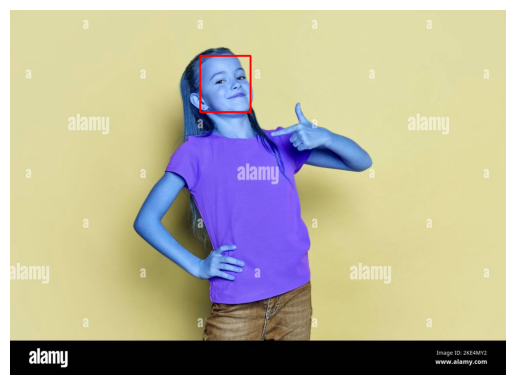

1/1 [==============================] - 0s 151ms/step


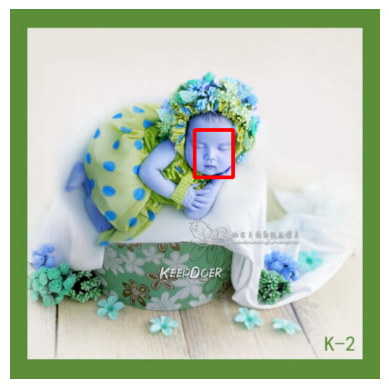

1/1 [==============================] - 0s 150ms/step


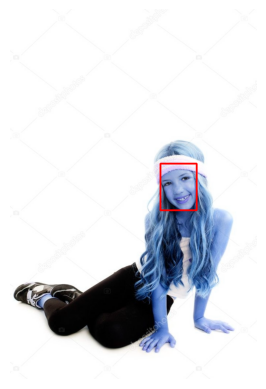

2/2 [==============================] - 0s 41ms/step


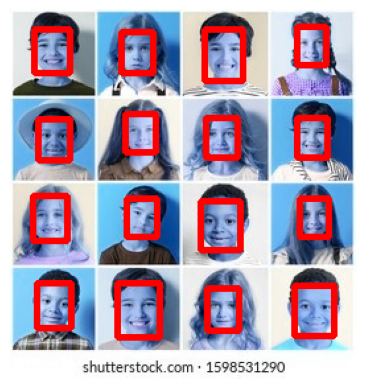

1/1 [==============================] - 0s 180ms/step


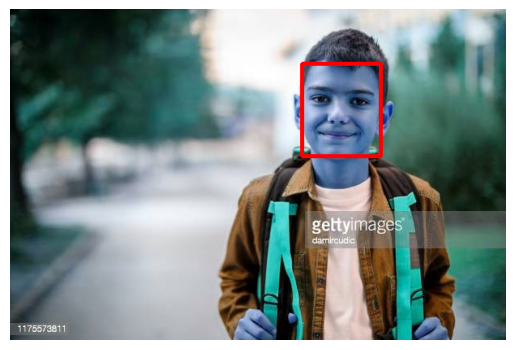

1/1 [==============================] - 0s 150ms/step


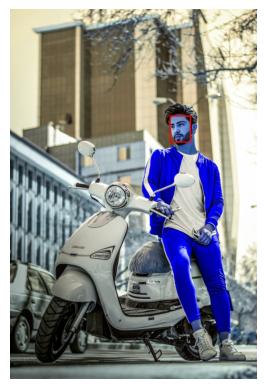

1/1 [==============================] - 0s 140ms/step


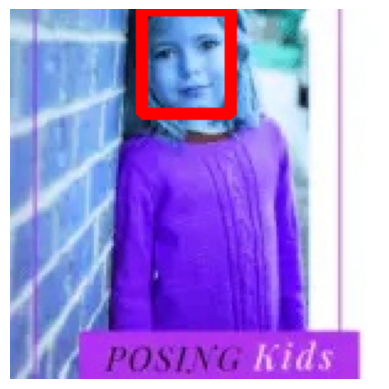

2/2 [==============================] - 0s 34ms/step


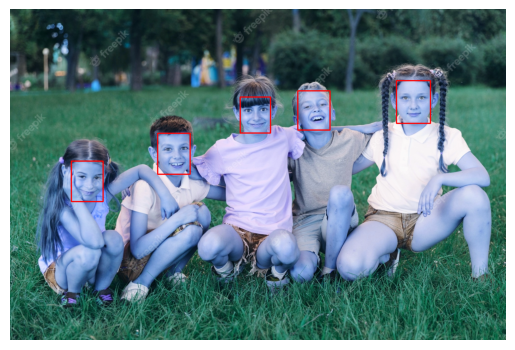

1/1 [==============================] - 0s 159ms/step


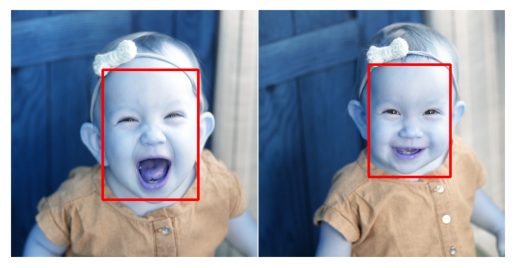

1/1 [==============================] - 0s 201ms/step


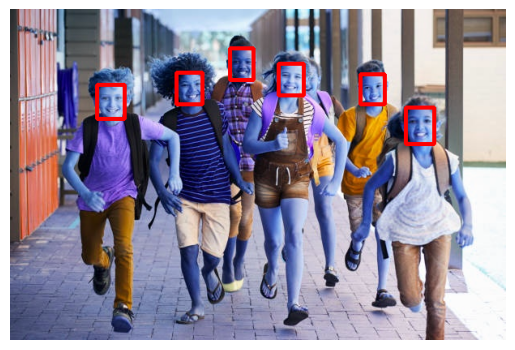

In [34]:
num_images_to_test = 10 # Number of images to test
num_processed_images = 0
image_files = sorted(os.listdir(data_dir))
index = len(image_files) 
images = image_files[index - 214:index + 10]

for image_name in images:
      if num_processed_images >= num_images_to_test:
        break
      else:
        image_path = os.path.join(data_dir, image_name)
        # Read the image
        image = cv2.imread(image_path)
        img= model(image)
        num_processed_images += 1
        plt.imshow(img,cmap = 'gray')
        plt.axis('off')  # Optional: turn off axes
        plt.show()